
Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  448
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [448 448   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

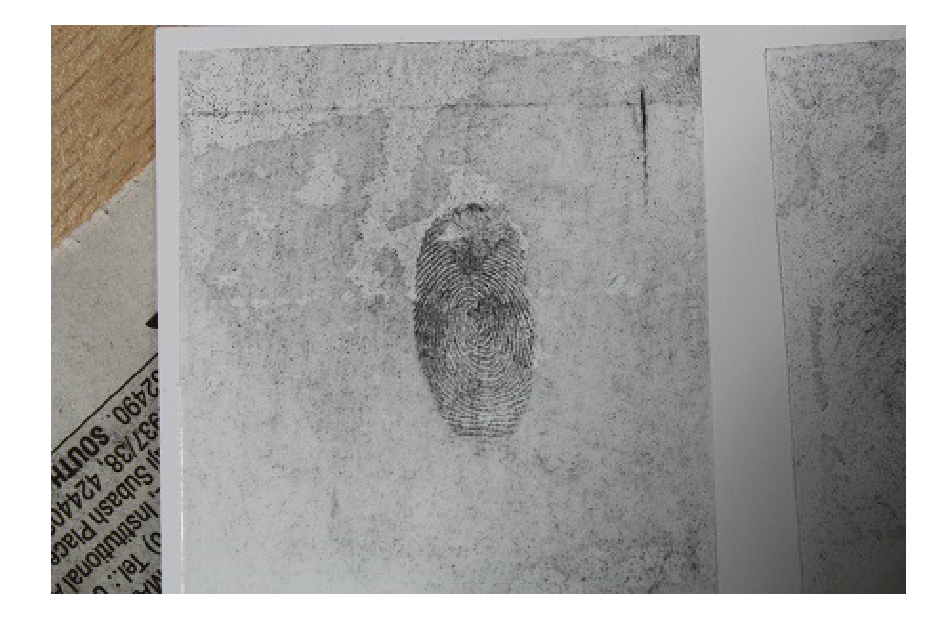

In [3]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
from mrcnn.config import Config

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt



%matplotlib inline



ROOT_DIR = os.path.abspath("../")

#print(ROOT_DIR)

sys.path.append(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
import coco

MODEL_DIR = os.path.join(ROOT_DIR, "mrcnn/logs")

COCO_MODEL_PATH = os.path.join(ROOT_DIR ,"logs/mask_rcnn_shapes_0050.h5")


IMAGE_DIR = os.path.join(ROOT_DIR, "ce_shi_ji")

class ShapesConfig(Config):
    NAME = "shapes"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1
    IMAGE_MIN_DIM = 320
    IMAGE_MAX_DIM = 448
    RPN_ANCHOR_SCALES = (8 * 6, 16 * 6, 32 * 6, 64 * 6, 128 * 6)
    TRAIN_ROIS_PER_IMAGE =100
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 50

class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1


config = InferenceConfig()
config.display()

model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)


model.load_weights(COCO_MODEL_PATH, by_name=True)
#                    ,
#                    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",
#                             "mrcnn_bbox", "mrcnn_mask"])


file_names = next(os.walk(IMAGE_DIR))[2]
class_names = ['BG', 'fingerprint1']

image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])

